In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Titanic Dataset – Exploratory Data Analysis

## The goal of this notebook is to explore the Titanic dataset, understand its structure, identify missing values, and gain initial insights into factors that may influence passenger survival.

## No data cleaning or modeling is performed in this notebook.

## Import required libraries

In [1]:
import pandas as pd 
import numpy as np

## Load the raw Titanic dataset

In [3]:
data=pd.read_csv("/kaggle/input/titanic-train-data/train.csv")

## Basic information about the dataset

In [7]:
data.shape


(891, 12)

In [10]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Missing values analysis

In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

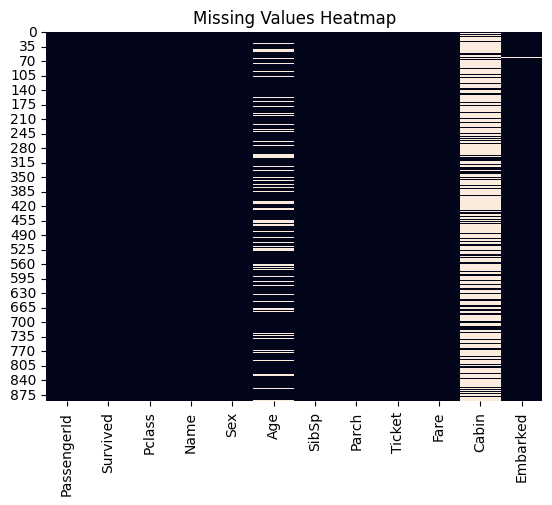

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


### Statistical summary of numerical features

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


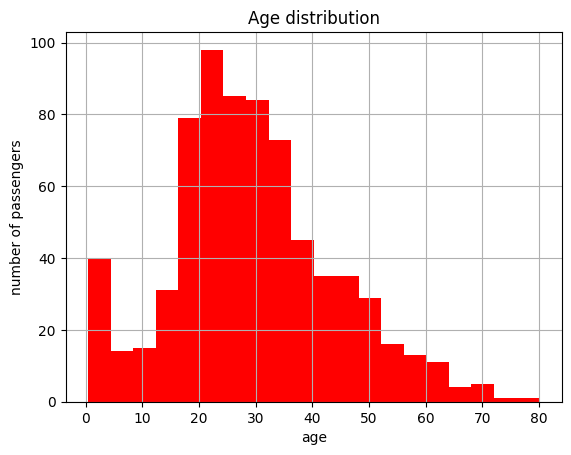

In [28]:
data["Age"].hist(bins=20,color="red") #bins=20 divied age to 20 block
plt.title("Age distribution")
plt.xlabel("age")
plt.ylabel("number of passengers")
plt.show()

### Analysis of the target variable (Survival)

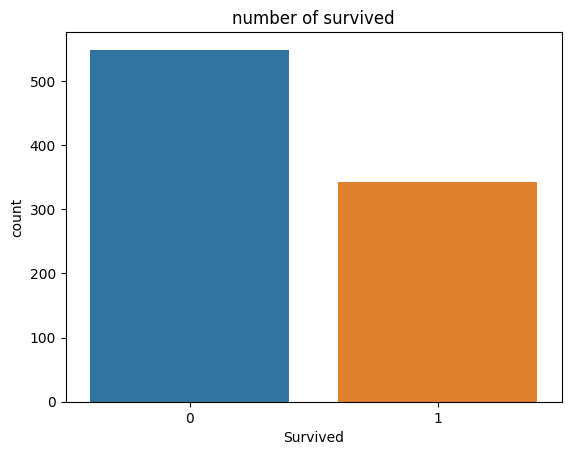

In [30]:
sns.countplot(x="Survived",data=data)
plt.title("number of survived")
plt.show()

In [33]:
data["Survived"].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

# Relationship Exploration

## Gender

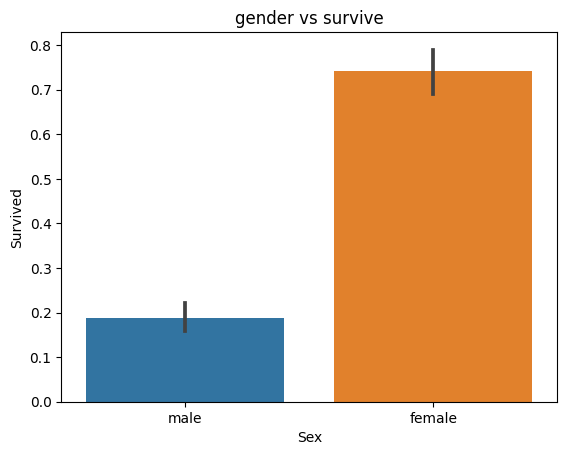

In [37]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("gender vs survive")
plt.show()

### Passenger Class

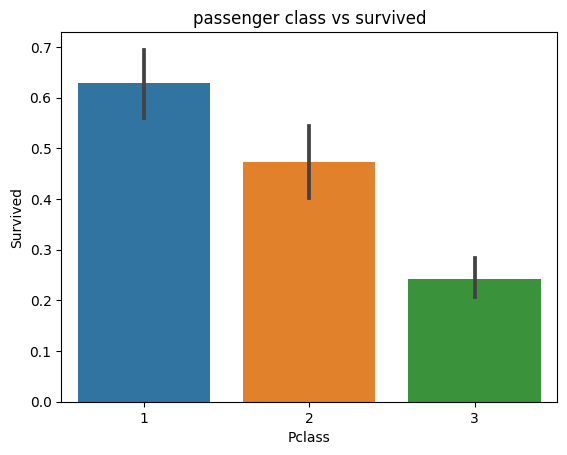

In [39]:
sns.barplot(x="Pclass",y="Survived",data=data)
plt.title("passenger class vs survived")
plt.show()

## EDA Conclusion

### Female passengers had higher survival rates

### Higher class passengers survived more

### Some features may need encoding or transformation before modeling